<a href="https://colab.research.google.com/github/ankitsingh379/black_friday_sales_eda/blob/main/black_fri_sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/content/drive/MyDrive/b_f_sale.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
df.shape

(537577, 12)

In [6]:
pf=df.drop(["Product_Category_2","Product_Category_3"],axis=1)

In [7]:
pf.shape

(537577, 10)

In [8]:
pf.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [9]:
pf["User_ID"].nunique()

5891

In [10]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


In [11]:
pf["Product_ID"].nunique()

3623

In [12]:
pf["Gender"].unique()

array(['F', 'M'], dtype=object)

In [13]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [14]:
df.groupby("User_ID").count().sort_values(by="Purchase",ascending=False)


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,
1001680,1025,1025,1025,1025,1025,1025,1025,1025,609,208,1025
1004277,978,978,978,978,978,978,978,978,563,209,978
1001941,898,898,898,898,898,898,898,898,564,219,898
1001181,861,861,861,861,861,861,861,861,533,196,861
1000889,822,822,822,822,822,822,822,822,543,205,822
...,...,...,...,...,...,...,...,...,...,...,...
1005608,6,6,6,6,6,6,6,6,5,3,6
1005810,6,6,6,6,6,6,6,6,4,2,6
1002111,6,6,6,6,6,6,6,6,3,1,6


In [15]:
df.groupby("User_ID").sum().sort_values(by="Purchase",ascending=False)

<ipython-input-15-eaef63b8164b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("User_ID").sum().sort_values(by="Purchase",ascending=False)


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,
1004277,15648,0,6107,5786.0,2662.0,10536783
1001680,20500,1025,6292,6135.0,2612.0,8699232
1002909,5019,0,4304,5080.0,2338.0,7577505
1001941,15266,0,5302,5542.0,2674.0,6817493
1000424,11798,0,4143,4293.0,2247.0,6573609
...,...,...,...,...,...,...
1004464,8,0,51,58.0,23.0,46091
1005944,140,0,98,106.0,29.0,46070
1005012,150,10,127,51.0,16.0,45551


In [16]:
df.groupby("User_ID").mean().sort_values(by="Purchase",ascending=False)

<ipython-input-16-d6b8ae0d69a5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("User_ID").mean().sort_values(by="Purchase",ascending=False)


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,
1005069,0.0,1.0,8.625000,11.692308,13.428571,19278.375000
1003902,5.0,0.0,1.258065,7.720930,12.375000,18777.247312
1005999,1.0,1.0,7.611111,10.615385,13.571429,18345.944444
1001349,7.0,1.0,1.000000,7.650000,11.714286,18162.739130
1000101,3.0,0.0,1.292308,6.745763,12.447368,17511.369231
...,...,...,...,...,...,...
1004636,2.0,1.0,4.600000,9.875000,14.000000,3852.866667
1002744,17.0,1.0,5.318681,7.051282,10.657143,3458.846154
1005944,10.0,0.0,7.000000,10.600000,14.500000,3290.714286


User_ID	:1001680 bought most of the product and 2nd most user to send amount

User_ID	:1004277 spent maximum amount

User_ID	:1005069 bought some of the most luxurius goods

#GENDER

In [17]:
pf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [18]:
pf.groupby("Gender").count()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
Gender,,,,,,,,,
F,132197,132197,132197,132197,132197,132197,132197,132197,132197
M,405380,405380,405380,405380,405380,405380,405380,405380,405380


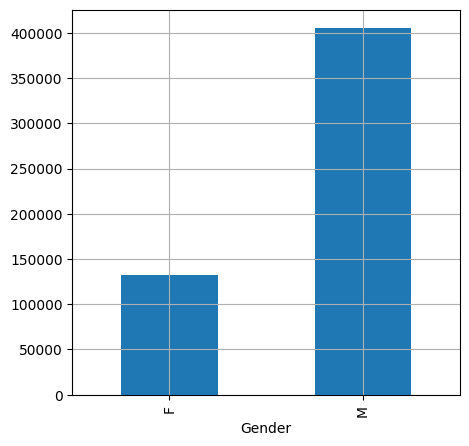

In [19]:
import matplotlib.pyplot as plt

pf.groupby("Gender").size().plot(kind="bar", figsize=(5, 5), grid=True,alpha=1)
plt.show()


In [20]:
gf=pf.groupby("Gender").sum()["Purchase"].reset_index(name='purches')

<ipython-input-20-63d6ecf9310d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gf=pf.groupby("Gender").sum()["Purchase"].reset_index(name='purches')


In [21]:
gf

,Gender,purches
0,F,1164624021
1,M,3853044357


<Axes: xlabel='Gender', ylabel='purches'>

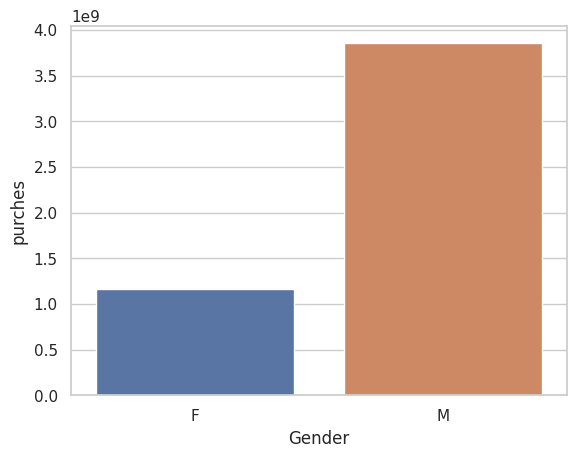

In [22]:
sns.set(style="whitegrid")
sns.barplot(x="Gender",y="purches",data=gf,estimator=sum)



<ipython-input-23-300cf631efd0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gf = pf.groupby("Gender").mean()["Purchase"]


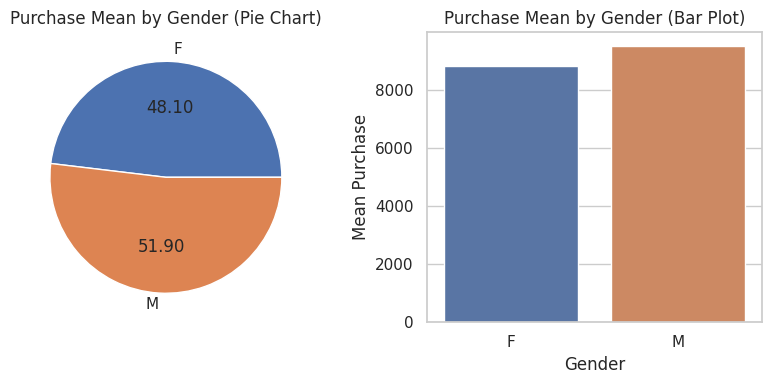

In [23]:
# Grouping the data by 'Gender' and calculating the mean of 'Purchase'
gf = pf.groupby("Gender").mean()["Purchase"]

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plotting the pie chart
ax1.pie(gf, labels=gf.index, autopct="%0.2f")
ax1.set_aspect('equal')
ax1.set_title('Purchase Mean by Gender (Pie Chart)')

# Plotting the bar plot
sns.barplot(x=gf.index, y=gf, ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Mean Purchase')
ax2.set_title('Purchase Mean by Gender (Bar Plot)')

# Displaying the plots
plt.tight_layout()
plt.show()

# **AGE**

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
Name: Purchase, dtype: int64

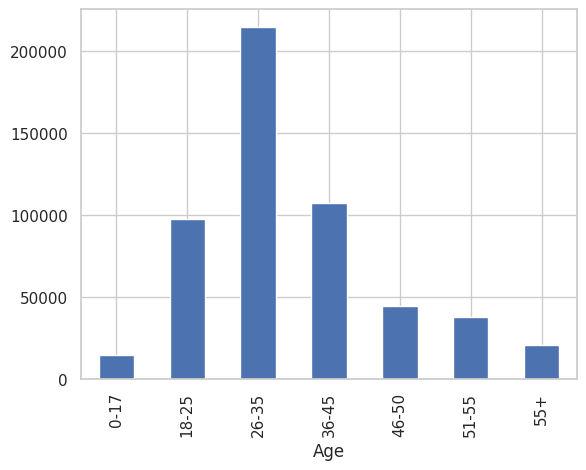

In [24]:
pf.groupby("Age").count()["Purchase"].plot(kind="bar",grid=True)
pf.groupby("Age").count()["Purchase"]

<ipython-input-25-6ccc1fa604d9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pf.groupby("Age").mean()["Purchase"].plot(kind="bar",grid=True)


<Axes: xlabel='Age'>

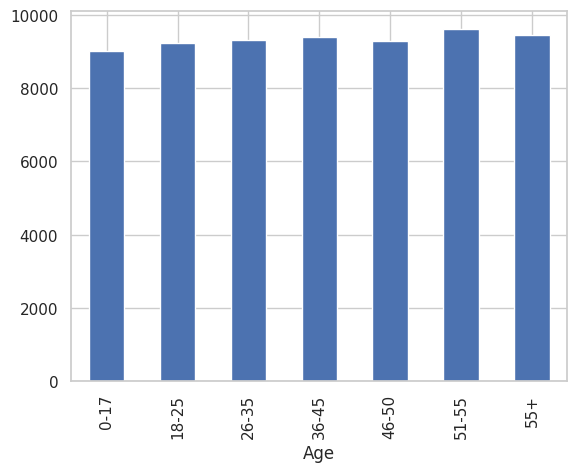

In [25]:
pf.groupby("Age").mean()["Purchase"].plot(kind="bar",grid=True)

<ipython-input-26-29094f96b040>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pf.groupby("Age").sum()["Purchase"].plot(kind="bar",grid=True)


<Axes: xlabel='Age'>

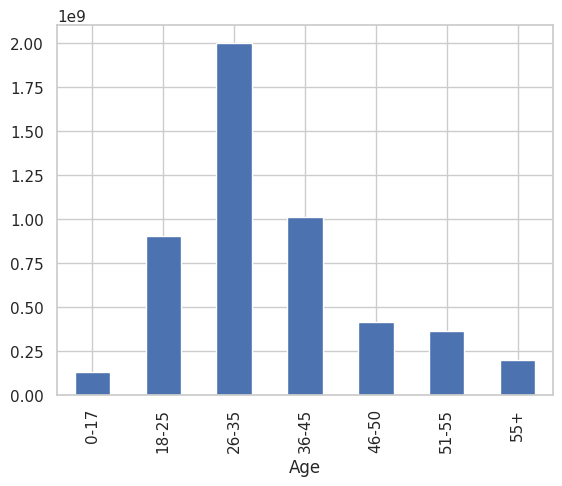

In [26]:
pf.groupby("Age").sum()["Purchase"].plot(kind="bar",grid=True)

most lux. spending age group age:51-55
most no. of products are bought by  age:26-35

# **marital status**


In [27]:
pf.groupby("Marital_Status").count()["Purchase"].reset_index()

,Marital_Status,Purchase
0,0,317817
1,1,219760


<Axes: >

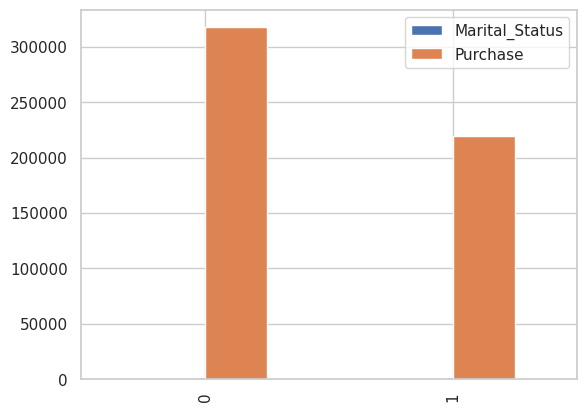

In [28]:
pf.groupby("Marital_Status").count()["Purchase"].reset_index().plot(kind = 'bar')

<ipython-input-29-3736ef0b4eac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pf.groupby("Marital_Status").sum()["Purchase"].reset_index().plot(kind = 'bar')


<Axes: >

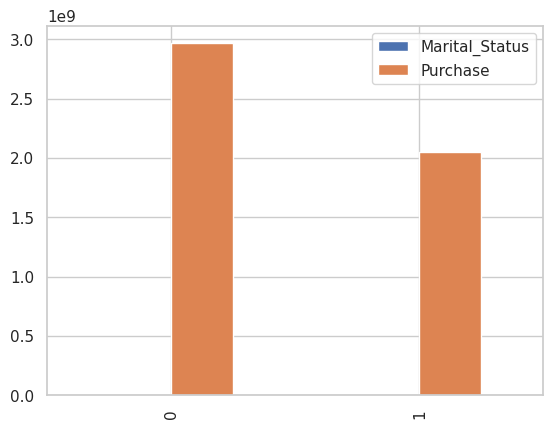

In [29]:
pf.groupby("Marital_Status").sum()["Purchase"].reset_index().plot(kind = 'bar')

<ipython-input-30-53f3d4dfe908>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pf.groupby("Marital_Status").mean()["Purchase"].reset_index().plot(kind = 'bar')


<Axes: >

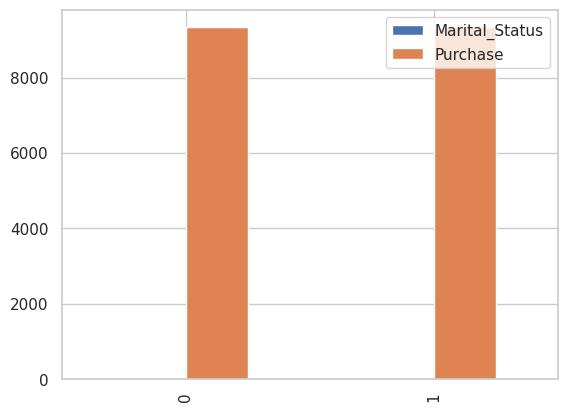

In [30]:
pf.groupby("Marital_Status").mean()["Purchase"].reset_index().plot(kind = 'bar')

1.Average cost of product bought by married and unmarried person are equal.

2.Unmarid people buy more things than married people.




MultiColumn Analysis

In [31]:
pf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<ipython-input-32-957e78677e02>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pf.groupby("City_Category").mean()["Purchase"].plot(kind="bar",figsize=(3,3))


<Axes: xlabel='City_Category'>

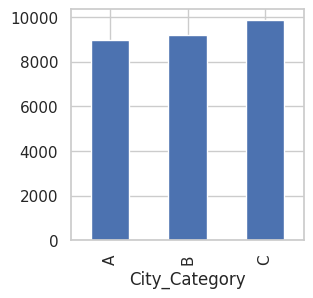

In [32]:
pf.groupby("City_Category").mean()["Purchase"].plot(kind="bar",figsize=(3,3))


<Axes: xlabel='City_Category'>

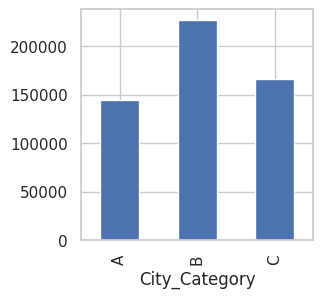

In [33]:
pf.groupby("City_Category").count()["Purchase"].plot(kind="bar",figsize=(3,3))

<ipython-input-34-b4733cd6d5e7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pf.groupby("City_Category").sum()["Purchase"].plot(kind="bar",figsize=(3,3))


<Axes: xlabel='City_Category'>

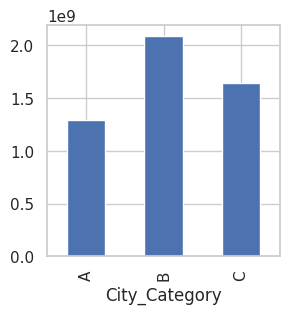

In [34]:
pf.groupby("City_Category").sum()["Purchase"].plot(kind="bar",figsize=(3,3))

<ipython-input-35-ceb3611914d5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pf.groupby("Stay_In_Current_City_Years").sum()["Purchase"].plot(kind="bar",figsize=(3,3))


<Axes: xlabel='Stay_In_Current_City_Years'>

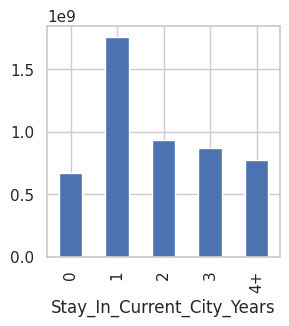

In [35]:
pf.groupby("Stay_In_Current_City_Years").sum()["Purchase"].plot(kind="bar",figsize=(3,3))

<Axes: xlabel='Stay_In_Current_City_Years'>

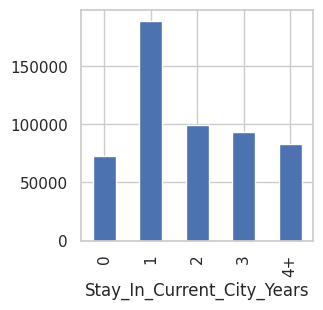

In [36]:
pf.groupby("Stay_In_Current_City_Years").count()["Purchase"].plot(kind="bar",figsize=(3,3))

<ipython-input-37-1d34e7be7352>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pf.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind="bar",figsize=(3,3))


<Axes: xlabel='Stay_In_Current_City_Years'>

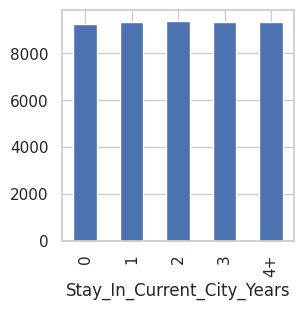

In [37]:
pf.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind="bar",figsize=(3,3))

# occupation and product analysis


In [38]:
pf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [42]:
pf['Occupation'].unique()


array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [43]:
pf['Occupation'].nunique()

21

<Axes: xlabel='Occupation', ylabel='count'>

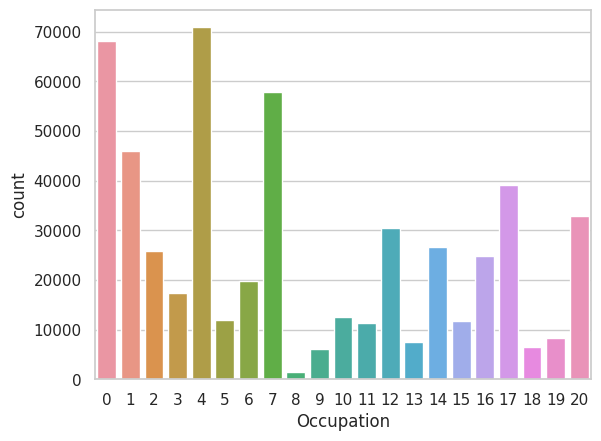

In [46]:
sns.countplot(x="Occupation",data=pf)

In [52]:
pf2.drop_duplicates()

In [53]:
pf2.head()

,User_ID,Occupation
0,1000001,10
4,1000002,16
5,1000003,15
6,1000004,7
9,1000005,20


<Axes: xlabel='Occupation'>

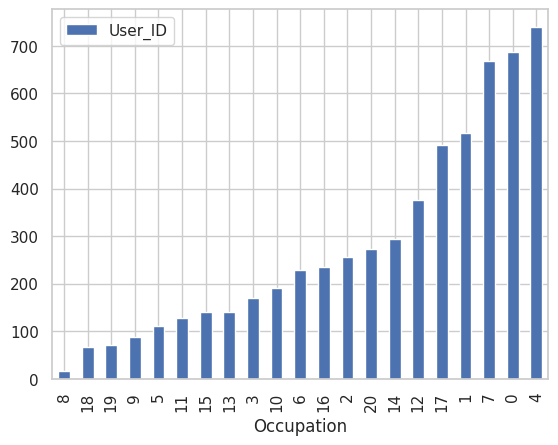

In [69]:
pf2.groupby("Occupation").count().sort_values(by="User_ID").plot(kind="bar")

**There are more people from 4th occupation**

<ipython-input-108-6b5a312b7a0e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rf3=pf.groupby("Occupation").sum()["Purchase"].reset_index()
<ipython-input-108-6b5a312b7a0e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rf4=pf.groupby("Occupation").mean()["Purchase"].reset_index()


Text(0.5, 1.0, 'average Purchase amount by Occupation')

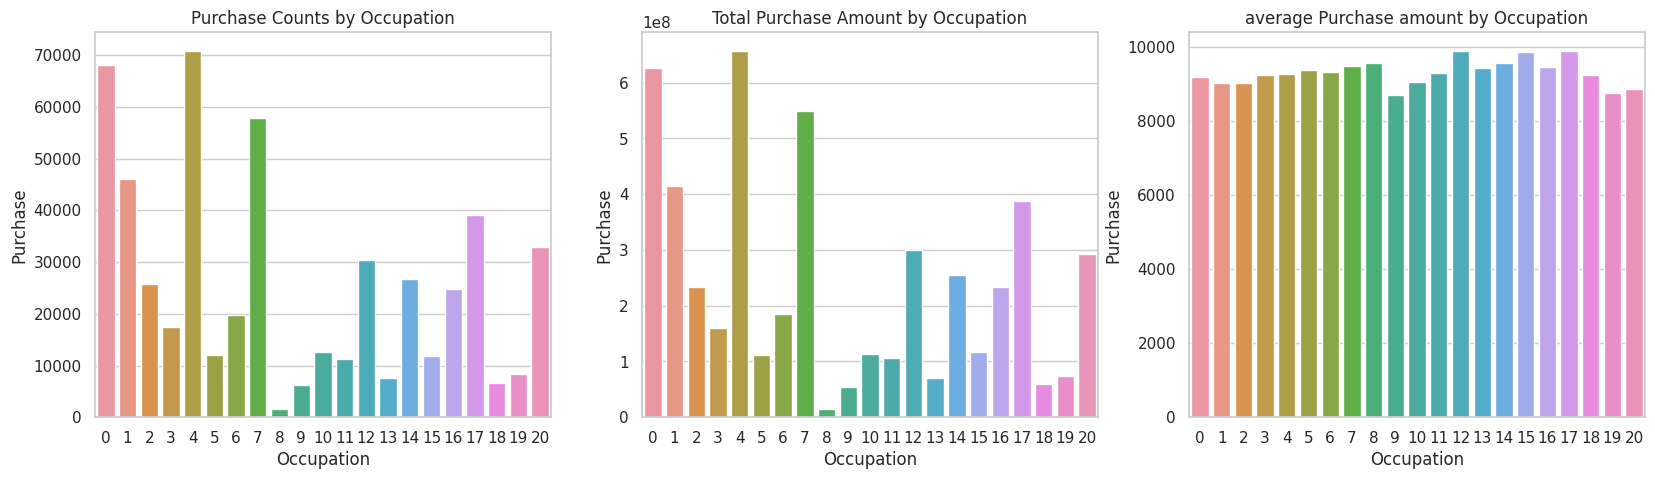

In [108]:

rf2=pf.groupby("Occupation").count()["Purchase"].reset_index()
rf3=pf.groupby("Occupation").sum()["Purchase"].reset_index()
rf4=pf.groupby("Occupation").mean()["Purchase"].reset_index()
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(x="Occupation",y="Purchase",data=rf2)
plt.title("Purchase Counts by Occupation")
plt.subplot(1,3,2)
sns.barplot(x="Occupation",y="Purchase",data=rf3)
plt.title("Total Purchase Amount by Occupation")
plt.subplot(1,3,3)
sns.barplot(x="Occupation",y="Purchase",data=rf4)
plt.title("average Purchase amount by Occupation")


**people from occupation_15_12_17 are richer**

**ocupation_4 and_5 people bought most of product  **


In [109]:
pf.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


<Axes: xlabel='Occupation', ylabel='count'>

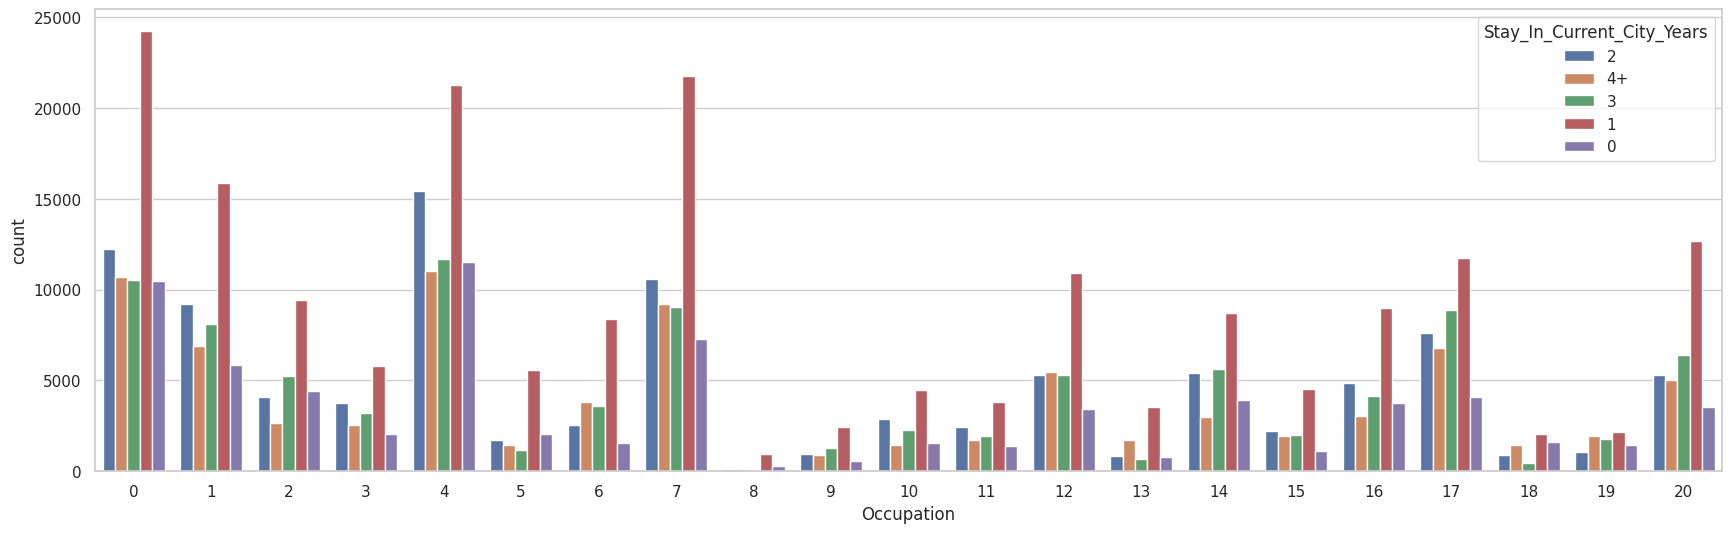

In [125]:
plt.figure(figsize=(21,6))
sns.countplot(x="Occupation",hue="Stay_In_Current_City_Years",data=pf)


**mostaly people living for 1 year in citybuy many number of product**

In [128]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

<Axes: xlabel='MaritalGender', ylabel='count'>

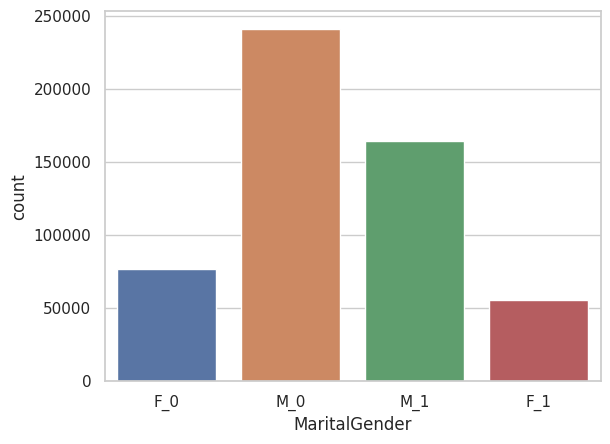

In [131]:
sns.countplot(x = df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

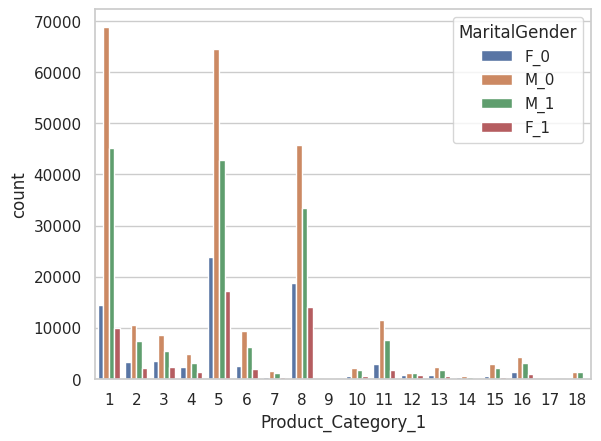

In [129]:
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])

**product_1 :1,5,8 are more in demand epecially by in married man.**

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

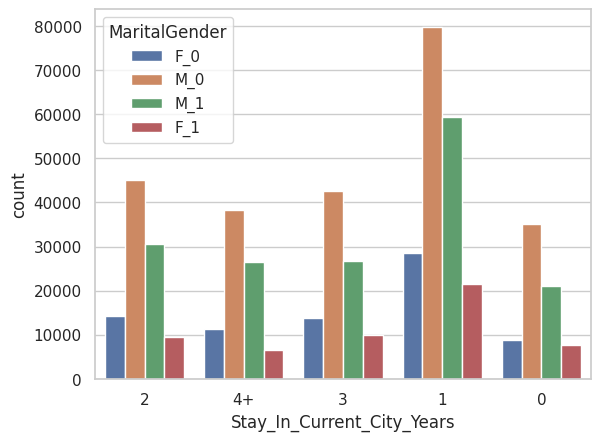

In [130]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])

**most of unmaried man recently shifted to the city**